In [116]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy.optimize import minimize
warnings.simplefilter(action="ignore", category=FutureWarning)

# Momentum Investing

In [117]:
stock=pd.read_csv("ind_nifty500list.csv")
stock.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG,EQ,INE212H01026


In [118]:
stock["Symbol"]=stock["Symbol"]+str(".NS")

In [119]:
stock_list=stock["Symbol"].to_list()

In [120]:
stock_list

['360ONE.NS',
 '3MINDIA.NS',
 'ABB.NS',
 'ACC.NS',
 'AIAENG.NS',
 'APLAPOLLO.NS',
 'AUBANK.NS',
 'AARTIIND.NS',
 'AAVAS.NS',
 'ABBOTINDIA.NS',
 'ACE.NS',
 'ADANIENSOL.NS',
 'ADANIENT.NS',
 'ADANIGREEN.NS',
 'ADANIPORTS.NS',
 'ADANIPOWER.NS',
 'ATGL.NS',
 'AWL.NS',
 'ABCAPITAL.NS',
 'ABFRL.NS',
 'AEGISLOG.NS',
 'AETHER.NS',
 'AFFLE.NS',
 'AJANTPHARM.NS',
 'APLLTD.NS',
 'ALKEM.NS',
 'ALKYLAMINE.NS',
 'ALLCARGO.NS',
 'ALOKINDS.NS',
 'ARE&M.NS',
 'AMBER.NS',
 'AMBUJACEM.NS',
 'ANANDRATHI.NS',
 'ANGELONE.NS',
 'ANURAS.NS',
 'APARINDS.NS',
 'APOLLOHOSP.NS',
 'APOLLOTYRE.NS',
 'APTUS.NS',
 'ACI.NS',
 'ASAHIINDIA.NS',
 'ASHOKLEY.NS',
 'ASIANPAINT.NS',
 'ASTERDM.NS',
 'ASTRAZEN.NS',
 'ASTRAL.NS',
 'ATUL.NS',
 'AUROPHARMA.NS',
 'AVANTIFEED.NS',
 'DMART.NS',
 'AXISBANK.NS',
 'BEML.NS',
 'BLS.NS',
 'BSE.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BAJAJHLDNG.NS',
 'BALAMINES.NS',
 'BALKRISIND.NS',
 'BALRAMCHIN.NS',
 'BANDHANBNK.NS',
 'BANKBARODA.NS',
 'BANKINDIA.NS',
 'MAHABANK.NS'

In [121]:
data  = yf.download(tickers=stock_list,start='2017-01-01')["Close"]

[*********************100%***********************]  499 of 499 completed

8 Failed downloads:
['SUVENPHAR.NS', 'GLS.NS', 'HBLPOWER.NS', 'GMRINFRA.NS', 'IDFC.NS', 'CENTURYTEX.NS', 'TV18BRDCST.NS', 'ZOMATO.NS']: YFTzMissingError('possibly delisted; no timezone found')


In [122]:
data.head()

Ticker,360ONE.NS,3MINDIA.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ACE.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,NaN,10535.651367,164.182495,NaN,907.836060,4362.166992,NaN,135.682602,1235.439575,44.308239,...,61.690876,NaN,871.479431,82.404259,222.252808,418.572876,165.329147,5179.115234,NaN,327.183777
2017-01-03,NaN,10402.960938,166.107071,NaN,915.234192,4308.193848,NaN,137.555450,1227.808960,45.030655,...,64.234352,NaN,908.325134,81.609131,225.796341,424.782898,165.846298,5185.142578,NaN,327.460632
2017-01-04,NaN,10299.333008,164.831909,NaN,909.368225,4272.674805,NaN,138.886154,1205.739258,45.512264,...,65.806686,NaN,925.578308,83.112000,225.844910,425.060944,164.487579,5197.937012,NaN,334.152008
2017-01-05,NaN,10574.672852,165.623001,NaN,906.829224,4263.240234,NaN,137.999008,1218.030640,45.849392,...,65.852928,NaN,910.713318,83.950798,234.980423,436.276062,166.381104,5200.555176,NaN,338.812897
2017-01-06,NaN,10772.494141,165.245178,NaN,914.358765,4258.985840,NaN,137.703308,1218.990112,47.583191,...,64.881790,NaN,897.164307,82.124657,242.077225,429.231842,164.662903,5143.792969,NaN,350.211334


In [123]:
data.fillna(0,inplace=True)

In [124]:
data.pct_change(axis=1).mean()

Ticker
360ONE.NS              NaN
3MINDIA.NS             inf
AARTIIND.NS      -0.977349
AAVAS.NS          1.512490
ABB.NS                 inf
                   ...    
ZEEL.NS           7.367732
ZENSARTECH.NS     0.830556
ZFCVINDIA.NS     30.786798
ZOMATO.NS        -1.000000
ZYDUSLIFE.NS           inf
Length: 499, dtype: float64

In [125]:
mean_percentage_change=data.pct_change()
index=mean_percentage_change.mean(axis=1)

In [126]:
index

Date
2017-01-02         NaN
2017-01-03    0.008404
2017-01-04    0.003757
2017-01-05    0.011736
2017-01-06   -0.002477
                ...   
2025-09-01    0.014184
2025-09-02    0.006674
2025-09-03    0.006937
2025-09-04   -0.005122
2025-09-05    0.000281
Length: 2146, dtype: float64

momentum logic
check the previous year returns
rank the stocks accordingly
take a long positions in the first 20 stocks for the next month
repeat the same cycle on the rolling basis.

In [127]:
previous_year_Dataset = data[0:252]

In [128]:
previous_year_Dataset_chg = previous_year_Dataset.pct_change()

In [129]:
previous_year_Dataset_chg.fillna(0,inplace=True)
previous_year_Dataset_chg.head()

Ticker,360ONE.NS,3MINDIA.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ACE.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2017-01-03,0.0,-0.012594,0.011722,0.0,0.008149,-0.012373,0.0,0.013803,-0.006176,0.016304,...,0.041229,0.0,0.042279,-0.009649,0.015944,0.014836,0.003128,0.001164,0.0,0.000846
2017-01-04,0.0,-0.009961,-0.007677,0.0,-0.006409,-0.008245,0.0,0.009674,-0.017975,0.010695,...,0.024478,0.0,0.018994,0.018415,0.000215,0.000655,-0.008193,0.002468,0.0,0.020434
2017-01-05,0.0,0.026734,0.004799,0.0,-0.002792,-0.002208,0.0,-0.006388,0.010194,0.007407,...,0.000703,0.0,-0.016060,0.010092,0.040450,0.026385,0.011512,0.000504,0.0,0.013948
2017-01-06,0.0,0.018707,-0.002281,0.0,0.008303,-0.000998,0.0,-0.002143,0.000788,0.037815,...,-0.014747,0.0,-0.014877,-0.021753,0.030202,-0.016146,-0.010327,-0.010915,0.0,0.033642


In [130]:
Ranks = np.cumprod(1+previous_year_Dataset_chg).tail(1).T

In [131]:
Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna()

Ticker
BSE.NS              inf
HUDCO.NS            inf
ICICIGI.NS          inf
SBILIFE.NS          inf
GICRE.NS            inf
                 ...   
MCX.NS         0.750686
TANLA.NS       0.705507
GLENMARK.NS    0.668917
LUPIN.NS       0.587050
J&KBANK.NS     0.516254
Name: 2018-01-04 00:00:00, Length: 499, dtype: float64

In [132]:
Momentum_picks = Ranks[Ranks.columns[0]].sort_values(ascending=False).dropna().index[0:20]

In [133]:
Momentum_picks.to_list()

['BSE.NS',
 'HUDCO.NS',
 'ICICIGI.NS',
 'SBILIFE.NS',
 'GICRE.NS',
 'CDSL.NS',
 'COCHINSHIP.NS',
 'ERIS.NS',
 'AUBANK.NS',
 'NAM-INDIA.NS',
 'TEJASNET.NS',
 'NIACL.NS',
 'HDFCLIFE.NS',
 'DMART.NS',
 'ABCAPITAL.NS',
 'TIINDIA.NS',
 'IEX.NS',
 'DIXON.NS',
 'HEG.NS',
 'GRAPHITE.NS']

In [134]:
nextmonth = data [252:252+22]
nextmonth.fillna(0,inplace=True)

/tmp/ipykernel_1467/3963132790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nextmonth.fillna(0,inplace=True)


In [135]:
nextmonth

Ticker,360ONE.NS,3MINDIA.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ACE.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-05,0.0,18455.220703,276.759949,0.0,1260.371460,5026.128418,184.850006,174.963028,1671.708008,151.152710,...,66.334442,0.0,1533.948730,108.665497,325.759033,546.712952,154.458908,7404.424316,0.0,409.193848
2018-01-08,0.0,18289.943359,271.842346,0.0,1262.567261,4986.353027,183.100006,176.441589,1685.608765,152.652161,...,66.940453,0.0,1525.642456,109.227165,326.493073,553.280884,156.780090,7335.577637,0.0,420.162689
2018-01-09,0.0,18074.490234,269.619965,0.0,1246.495117,4945.505371,183.750000,175.702316,1673.647583,149.846771,...,68.432152,0.0,1500.968506,111.350983,334.077942,540.377991,158.816650,7250.211914,0.0,412.958557
2018-01-10,0.0,17598.617188,265.033356,0.0,1243.069946,4914.273926,183.199997,172.153763,1677.804077,154.973862,...,71.322350,0.0,1514.746704,114.685890,332.560944,540.797241,160.132858,7414.663086,0.0,412.447357
2018-01-11,0.0,17239.134766,266.688263,0.0,1229.193604,5039.433105,185.000000,171.365204,1664.457520,161.842239,...,72.487732,0.0,1528.574219,112.720047,335.839600,540.331421,162.320633,7275.534668,0.0,413.562805
2018-01-12,0.0,17012.824219,266.298126,0.0,1297.872681,5089.617676,184.100006,173.878754,1667.089722,162.084076,...,73.559906,0.0,1512.548218,111.912651,333.637512,550.579102,161.546936,7541.178223,0.0,416.955719
2018-01-15,0.0,17098.152344,266.038025,0.0,1330.367676,5025.941895,184.750000,168.802368,1690.226685,160.633026,...,73.559906,0.0,1477.759888,110.578697,328.841919,564.692993,160.622009,7516.993164,0.0,409.193848
2018-01-16,0.0,16919.867188,266.014496,0.0,1325.493408,5041.907227,180.800003,166.781662,1708.929932,152.990723,...,69.317856,0.0,1473.362793,116.528862,327.716431,571.447144,158.558762,7368.418945,0.0,405.382629
2018-01-17,0.0,17160.140625,263.000031,0.0,1359.964600,5101.475586,181.600006,165.303101,1699.924683,151.104324,...,70.250168,0.0,1461.880737,114.334854,335.105591,552.535461,159.350250,7258.125977,0.0,409.240356


In [136]:
(np.cumprod(1+nextmonth[Momentum_picks].pct_change())-1).iloc[-1].sort_values().mean()

-0.07750340999451992

In [137]:
def optimize_weights(mean_returns,cov_matrix,risk_free_rate = 0.06):
    num_assets = len(mean_returns)

    def neg_sharpe(weights):
        port_returns = np.dot(weights,mean_returns)
        port_vol = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))
        return -((port_returns - risk_free_rate)/port_vol if port_vol>0 else -np.inf)
    constraints = ({'type':'eq','fun':lambda w: np.sum(w)-1})
    bounds = tuple((0,1) for _ in range(num_assets))
    initial = np.array(num_assets*[1. /num_assets])
    result = minimize(neg_sharpe,initial,bounds=bounds,constraints = constraints)
    return result.x

In [138]:
def calculate_monthly_returns(data):
    lst = []
    for i in range(0, len(data) - 44, 22):
        # Ensure enough lookback data
        if len(data) < i + 252:
            break
        
        # Previous 1-year dataset
        previous_year_dataset = data.iloc[i+1:i+252]
        pyd_chg = previous_year_dataset.pct_change().dropna(how="all")
        
        # Cumulative returns over the year
        ranks = (1 + pyd_chg).cumprod().iloc[-1]
        
        # Pick top 20 momentum stocks (skip if fewer available)
        momentum_picks = ranks.dropna().sort_values(ascending=False).head(20).index.tolist()
        
        next_month = data.iloc[i+252:i+252+22]

        if not next_month.empty and momentum_picks:
            # In-sample returns for optimization
            insample_returns = previous_year_dataset[momentum_picks].pct_change().dropna(how="all")
            if insample_returns.empty:
                print(f"Skipping i={i}: no valid in-sample returns")
                continue
            
            mean_returns = insample_returns.mean()
            cov_matrix = insample_returns.cov()
            
            # Optimize weights (user-defined function, must return len(momentum_picks) weights)
            opt_weights = optimize_weights(mean_returns, cov_matrix)
            
            # Next month returns
            next_month_chg = next_month[momentum_picks].pct_change().dropna(how="all")
            if next_month_chg.empty:
                print(f"Skipping i={i}: no valid next-month returns")
                continue
            
            next_month_returns = (1 + next_month_chg).cumprod().iloc[-1] - 1
            next_month_returns = next_month_returns.dropna()
            
            if next_month_returns.empty:
                print(f"Skipping i={i}: all next-month returns are NaN")
                continue
            
            # Align weights with surviving assets
            common_assets = next_month_returns.index
            aligned_weights = (
                pd.Series(opt_weights, index=momentum_picks)
                .reindex(common_assets)
                .fillna(0)
                .values
            )
            
            # Portfolio return
            monthly_returns = np.dot(aligned_weights, next_month_returns.values)
            monthly_date = next_month.index[-1]
            lst.append((monthly_date, monthly_returns))
        else:
            print(f"Skipping iteration at i={i} due to insufficient data or no momentum picks.")
    
    return lst

# Example usage (assuming 'data' is your DataFrame with prices):
results = calculate_monthly_returns(data)


In [139]:
result = pd.DataFrame(results)
result.head()

,0,1
0,2018-02-06,-0.077503
1,2018-03-12,-0.022732
2,2018-04-13,0.023046
3,2018-05-16,-0.023015
4,2018-06-15,-0.001063


# DOWNTREND MOMENTUM

Buy and Hold Total Return: 33.35%
Momentum Total Return: 25.08%
Buy and Hold Sharpe Ratio: 0.48
Momentum Sharpe Ratio: 0.48


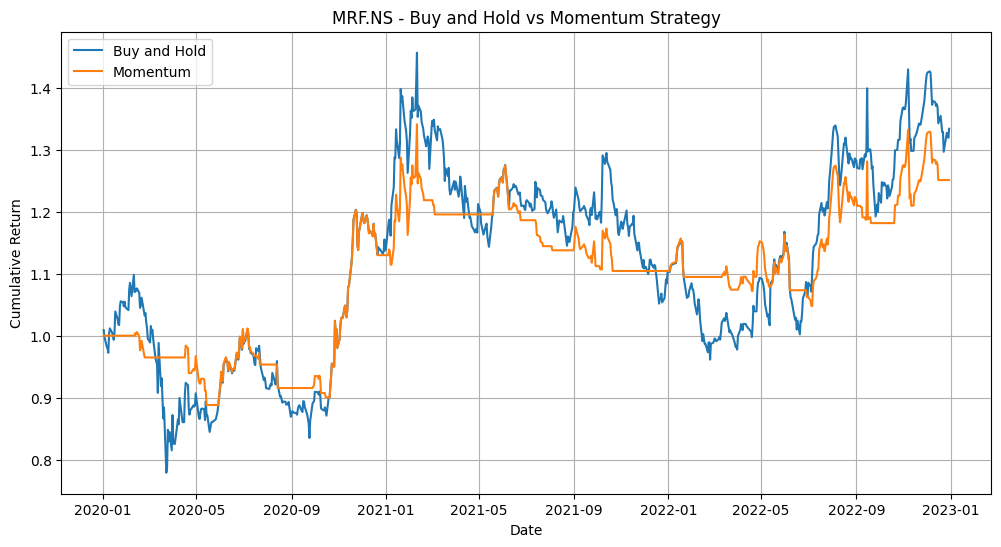

In [140]:
def compare_strategies(ticker, start_date, end_date, momentum_period=50):
    # Fetch data
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)

    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()

    # Buy and Hold Strategy
    df['Buy_Hold'] = (1 + df['Daily_Return']).cumprod()

    # Momentum Strategy
    df['SMA'] = df['Close'].rolling(window=momentum_period).mean()
    df['Signal'] = np.where(df['Close'] > df['SMA'], 1, 0)
    df['Momentum_Return'] = df['Signal'].shift(1) * df['Daily_Return']
    df['Momentum'] = (1 + df['Momentum_Return']).cumprod()

    # Calculate metrics
    buy_hold_return = df['Buy_Hold'].iloc[-1] - 1
    momentum_return = df['Momentum'].iloc[-1] - 1

    buy_hold_sharpe = np.sqrt(252) * df['Daily_Return'].mean() / df['Daily_Return'].std()
    momentum_sharpe = np.sqrt(252) * df['Momentum_Return'].mean() / df['Momentum_Return'].std()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Buy_Hold'], label='Buy and Hold')
    plt.plot(df.index, df['Momentum'], label='Momentum')
    plt.title(f'{ticker} - Buy and Hold vs Momentum Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)

    # Print metrics
    print(f"Buy and Hold Total Return: {buy_hold_return:.2%}")
    print(f"Momentum Total Return: {momentum_return:.2%}")
    print(f"Buy and Hold Sharpe Ratio: {buy_hold_sharpe:.2f}")
    print(f"Momentum Sharpe Ratio: {momentum_sharpe:.2f}")

    plt.show()

    return df

# Example usage
ticker = "MRF.NS"  # Apple Inc.
start_date = "2020-01-01"
end_date = "2022-12-31"
momentum_period = 30

results = compare_strategies(ticker, start_date, end_date, momentum_period)

# UPTREND MOMENTUM

Buy and Hold Total Return: 112.73%
Momentum Total Return: 139.86%
Buy and Hold Sharpe Ratio: 0.92
Momentum Sharpe Ratio: 1.33


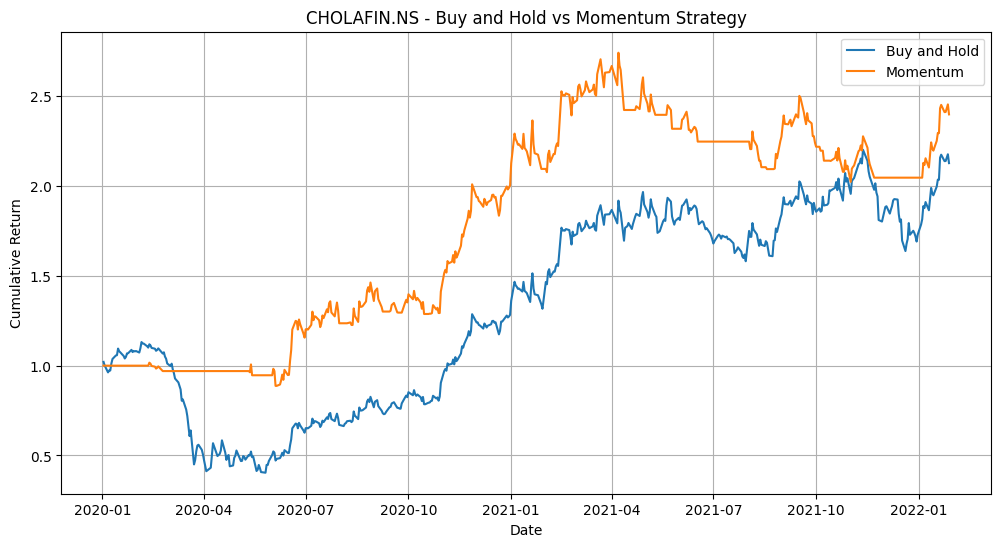

In [141]:
def compare_strategies(ticker, start_date, end_date, momentum_period=50):
    # Fetch data
    stock = yf.Ticker(ticker)
    df = stock.history(start=start_date, end=end_date)

    # Calculate daily returns
    df['Daily_Return'] = df['Close'].pct_change()

    # Buy and Hold Strategy
    df['Buy_Hold'] = (1 + df['Daily_Return']).cumprod()

    # Momentum Strategy
    df['SMA'] = df['Close'].rolling(window=momentum_period).mean()
    df['Signal'] = np.where(df['Close'] > df['SMA'], 1, 0)
    df['Momentum_Return'] = df['Signal'].shift(1) * df['Daily_Return']
    df['Momentum'] = (1 + df['Momentum_Return']).cumprod()

    # Calculate metrics
    buy_hold_return = df['Buy_Hold'].iloc[-1] - 1
    momentum_return = df['Momentum'].iloc[-1] - 1

    buy_hold_sharpe = np.sqrt(252) * df['Daily_Return'].mean() / df['Daily_Return'].std()
    momentum_sharpe = np.sqrt(252) * df['Momentum_Return'].mean() / df['Momentum_Return'].std()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Buy_Hold'], label='Buy and Hold')
    plt.plot(df.index, df['Momentum'], label='Momentum')
    plt.title(f'{ticker} - Buy and Hold vs Momentum Strategy')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)

    # Print metrics
    print(f"Buy and Hold Total Return: {buy_hold_return:.2%}")
    print(f"Momentum Total Return: {momentum_return:.2%}")
    print(f"Buy and Hold Sharpe Ratio: {buy_hold_sharpe:.2f}")
    print(f"Momentum Sharpe Ratio: {momentum_sharpe:.2f}")

    plt.show()

    return df

# Example usage
ticker = "CHOLAFIN.NS"  # Apple Inc.
start_date = "2020-01-01"
end_date = "2022-01-31"
momentum_period = 30

results = compare_strategies(ticker, start_date, end_date, momentum_period)

# PORTFOLIO BACKTESTING

Date: 2019-02-07 00:00:00, Monthly Return: -0.0663
Date: 2019-03-13 00:00:00, Monthly Return: 0.1458
Date: 2019-04-16 00:00:00, Monthly Return: 0.0396
Date: 2019-05-22 00:00:00, Monthly Return: 0.0033
Date: 2019-06-24 00:00:00, Monthly Return: -0.0104
Date: 2019-07-24 00:00:00, Monthly Return: 0.0209
Date: 2019-08-27 00:00:00, Monthly Return: -0.0089
Date: 2019-09-30 00:00:00, Monthly Return: 0.1429
Date: 2019-11-04 00:00:00, Monthly Return: 0.0840
Date: 2019-12-05 00:00:00, Monthly Return: 0.0203
Date: 2020-01-07 00:00:00, Monthly Return: 0.0373
Date: 2020-02-06 00:00:00, Monthly Return: 0.0976
Date: 2020-03-11 00:00:00, Monthly Return: -0.1768
Date: 2020-04-16 00:00:00, Monthly Return: -0.0774
Date: 2020-05-19 00:00:00, Monthly Return: -0.0321
Date: 2020-06-19 00:00:00, Monthly Return: 0.2577
Date: 2020-07-21 00:00:00, Monthly Return: 0.0415
Date: 2020-08-20 00:00:00, Monthly Return: 0.1469
Date: 2020-09-21 00:00:00, Monthly Return: 0.0253
Date: 2020-10-22 00:00:00, Monthly Return: 0

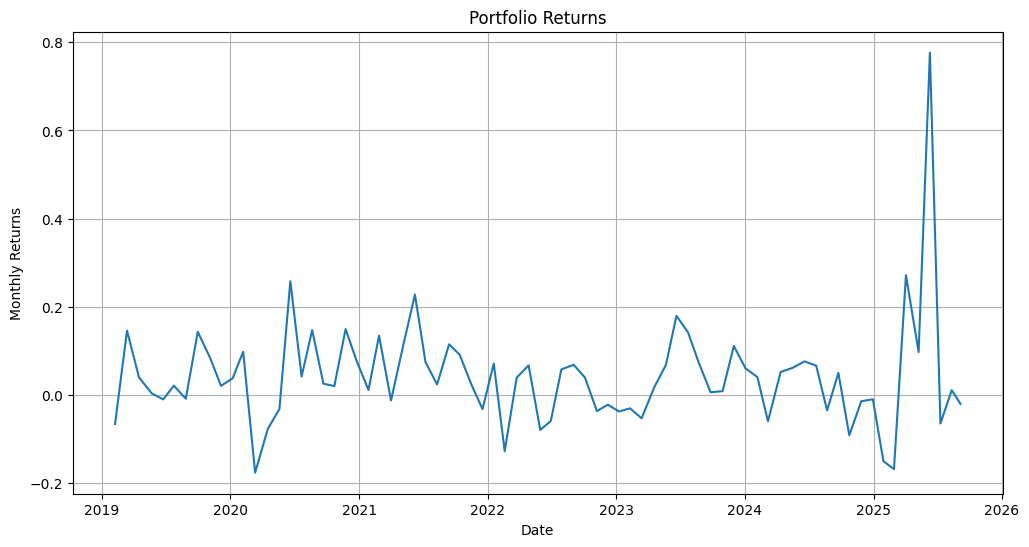

In [142]:
def backtest_strategy(data, start_date):
    # Filter data from the start date
    data = data[data.index >= start_date]

    # Calculate monthly returns using the momentum strategy
    results = calculate_monthly_returns(data)

    # Print numerical values of returns
    for date, return_value in results:
        print(f"Date: {date}, Monthly Return: {return_value:.4f}")  # Format to 4 decimal places

    # Extract dates and returns for plotting
    dates = [result[0] for result in results]
    returns = [result[1] for result in results]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(dates, returns)
    plt.xlabel('Date')
    plt.ylabel('Monthly Returns')
    plt.title('Portfolio Returns')
    plt.grid(True)
    plt.show()

    return results,returns

# Run the backtest
results,returns = backtest_strategy(data, start_date='2018-01-01')

In [143]:
def calculate_sortino_ratio(returns, risk_free_rate=0.05):
    mean_return = np.mean(returns)
    downside_returns = np.where(np.array(returns) < 0, returns, 0)
    downside_std = np.std(downside_returns)

    if downside_std == 0:
        return np.nan  # Undefined when there is no downside risk

    sortino_ratio = (mean_return - risk_free_rate) / downside_std
    return sortino_ratio
def drawdown(series):
    drawdown = (series - series.cummax()) / series.cummax()
    return drawdown.min()

def calculate_calmar_ratio(returns):
    cumulative_return = np.prod(1 + np.array(returns)) - 1
    annual_return = (1 + cumulative_return) ** (12 / len(returns)) - 1

    max_drawdown = drawdown(pd.Series(np.cumprod(1 + np.array(returns))))
    if max_drawdown == 0:
        return np.nan  # Undefined when there is no drawdown

    calmar_ratio = annual_return / abs(max_drawdown)
    return calmar_ratio


In [144]:
calmer_ratio = calculate_calmar_ratio(returns)
sortino_ratio = calculate_sortino_ratio(returns)

In [145]:
print('Sortino Ratio of the strategy: ',sortino_ratio)
print('Calmer Ratio of the strategy: ',calmer_ratio)

Sortino Ratio of the strategy:  -0.20433493133061387
Calmer Ratio of the strategy:  1.402124370310032


In [146]:
def calculate_sharpe_ratio(returns_df, risk_free_rate=0.05):

    # Calculate Sharpe Ratio
    average_return = np.mean(returns)
    volatility = np.std(returns)

    if volatility == 0:
        return np.nan  # Return NaN if volatility is zero (undefined)

    sharpe_ratio = (average_return - risk_free_rate) / volatility * np.sqrt(252)  # Assuming 252 trading days in a year

    return sharpe_ratio

In [147]:
sharpe_ratio = calculate_sharpe_ratio(returns)
sharpe_ratio

-1.0545536044716561

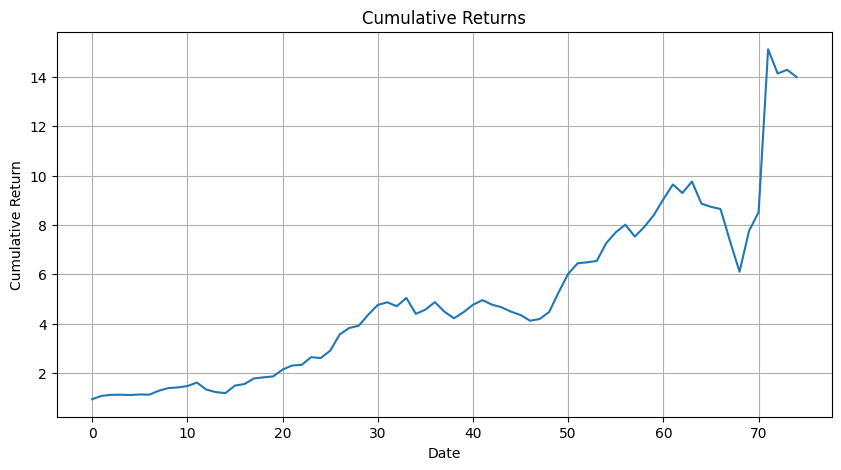

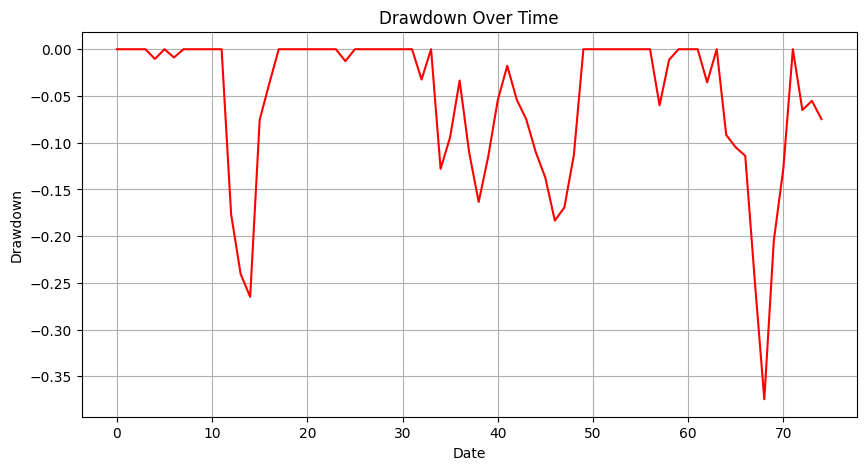

In [155]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert returns to pandas Series if it's a list
returns = pd.Series(returns)

# 1. Cumulative Returns Over Time
cumulative_returns = (1 + returns).cumprod()
plt.figure(figsize=(10,5))
plt.plot(cumulative_returns)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# 3. Drawdown Curve
cumulative_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - cumulative_max) / cumulative_max
plt.figure(figsize=(10,5))
plt.plot(drawdown, color='red')
plt.title('Drawdown Over Time')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()